<a href="https://colab.research.google.com/github/notyourfriends/Playground/blob/main/Jupyter/Tech_Layoffs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load the data

In [446]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [447]:
import pandas as pd

In [448]:
data = pd.read_csv('/content/drive/MyDrive/CSVs/tech_layoffs.csv')

In [449]:
data.columns

Index(['company', 'total_layoffs', 'impacted_workforce_percentage',
       'reported_date', 'industry', 'headquarter_location', 'sources',
       'status', 'additional_notes'],
      dtype='object')

In [450]:
data.head(5)

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,additional_notes
0,C2FO,20,2,12/9/2022,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private,NaN
1,VideoAmp,Unclear,2,9/19/2022,Advertising platforms,Los Angeles,Company memo,Private,NaN
2,Amperity,13,3,8/20/2022,"Saas, analytics",Seattle,Geekwire,Private,NaN
3,Addepar,20,3,1/18/2023,"fintech, data analytics","Mountain View, CA",Fortune,Private,NaN
4,Thirty Madison,24,3,5/13/2022,Health Care,New York,Axios,Private,"Per Axios, 22 of the employees laid off were f..."


# Preprocess

In [451]:
data['Date'] = pd.to_datetime(data['reported_date'])
data['Month'] = data['Date'].dt.month
data['Year'] = pd.to_datetime(data['Date']).dt.strftime('%Y')

In [452]:
data.isnull().sum()

company                            0
total_layoffs                      0
impacted_workforce_percentage      0
reported_date                      0
industry                           0
headquarter_location               0
sources                            0
status                             0
additional_notes                 467
Date                               0
Month                              0
Year                               0
dtype: int64

ada sebanyak 467 data kosong di "additional_notes", drop aja ga penting juga wkwk

In [453]:
data.drop('additional_notes', inplace=True, axis=1)

In [454]:
data.head()

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,Date,Month,Year
0,C2FO,20,2,12/9/2022,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private,2022-12-09,12,2022
1,VideoAmp,Unclear,2,9/19/2022,Advertising platforms,Los Angeles,Company memo,Private,2022-09-19,9,2022
2,Amperity,13,3,8/20/2022,"Saas, analytics",Seattle,Geekwire,Private,2022-08-20,8,2022
3,Addepar,20,3,1/18/2023,"fintech, data analytics","Mountain View, CA",Fortune,Private,2023-01-18,1,2023
4,Thirty Madison,24,3,5/13/2022,Health Care,New York,Axios,Private,2022-05-13,5,2022


In [455]:
data.columns

Index(['company', 'total_layoffs', 'impacted_workforce_percentage',
       'reported_date', 'industry', 'headquarter_location', 'sources',
       'status', 'Date', 'Month', 'Year'],
      dtype='object')

In [456]:
dn = data['sources'].value_counts()
dn

TechCrunch          52
The Information     23
Business Insider    23
Calcalistech        20
LinkedIn            16
                    ..
CityWire             1
OneTrust             1
Mobi Health News     1
Homeward             1
Doma                 1
Name: sources, Length: 221, dtype: int64

based on sources, most of the data acquired from TechCrunch

In [457]:
industry_counts = data.groupby('industry').size().reset_index(name='count').sort_values(by='count', ascending=False)
industry_counts

,industry,count
91,Fintech,24
109,Health Care,17
166,PropTech,15
63,E-commerce,13
52,Cybersecurity,10
...,...,...
121,"IT, future of work",1
122,"IT, software",1
125,"Insurance, fintech",1
126,Insurtech,1


ternyata golongan paling banyak layoff ada di industri Fintech

berhubung namanya tidak seragam dan ada simbol, saatnya menyelaraskan nama tersebut

In [458]:
ind = []
for i in data['industry'].to_list():
    ind.append(i.split(' ')[-1])

ind = [x.lower() for x in ind]
ind = [x.replace("-", "") for x in ind]

data['industry'] = ind

In [459]:
data['industry'].head(10)

0         payments
1        platforms
2        analytics
3        analytics
4             care
5             tech
6    cybersecurity
7        ecommerce
8         wellness
9             tech
Name: industry, dtype: object

In [460]:
industry_counts = data.groupby('industry').size().reset_index(name='count').sort_values(by='count', ascending=False)
industry_counts

,industry,count
53,fintech,35
107,software,32
94,proptech,30
40,ecommerce,29
20,care,27
...,...,...
49,events,1
46,esignature,1
44,energy,1
42,editing,1


In [461]:
data['industry'].head(10).to_list()

['payments',
 'platforms',
 'analytics',
 'analytics',
 'care',
 'tech',
 'cybersecurity',
 'ecommerce',
 'wellness',
 'tech']

lakukan hal yang sama pada kolom HQ

In [462]:
data['headquarter_location'].head()

0          Leawood, KS
1          Los Angeles
2              Seattle
3    Mountain View, CA
4             New York
Name: headquarter_location, dtype: object

In [463]:
data['headquarter_location'] = data['headquarter_location'].str.lower().str.replace("-", '').str.replace(" ", '').str.split(',').str[-1]

jadi ini bisa juga digunakan dari pada sebelumnya yang harus ngasih array kosong dahulu.

In [464]:
data['headquarter_location'].head()

0            ks
1    losangeles
2       seattle
3            ca
4       newyork
Name: headquarter_location, dtype: object

semua data udah seragam sekarang

In [465]:
data.head(10)

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,Date,Month,Year
0,C2FO,20,2,12/9/2022,payments,ks,Kansas City Business Journal,Private,2022-12-09,12,2022
1,VideoAmp,Unclear,2,9/19/2022,platforms,losangeles,Company memo,Private,2022-09-19,9,2022
2,Amperity,13,3,8/20/2022,analytics,seattle,Geekwire,Private,2022-08-20,8,2022
3,Addepar,20,3,1/18/2023,analytics,ca,Fortune,Private,2023-01-18,1,2023
4,Thirty Madison,24,3,5/13/2022,care,newyork,Axios,Private,2022-05-13,5,2022
5,NextRoll,Unclear,3,7/8/2022,tech,sanfrancisco,Business Insider,Private,2022-07-08,7,2022
6,Armis Security,25,4,12/8/2022,cybersecurity,sanfrancisco,Calcalistech,Private,2022-12-08,12,2022
7,Foxtrot,26,4,9/23/2022,ecommerce,chicago,Chicago Business,Private,2022-09-23,9,2022
8,Headspace Health,50,4,12/14/2022,wellness,losangeles,Bloomberg,Private,2022-12-14,12,2022
9,RealSelf,11,5,7/21/2022,tech,seattle,GeekWire,Private,2022-07-21,7,2022


# EDA (Exploratory Data Analysis)

cek dulu kolom total layoff

In [466]:
data['total_layoffs']

0           20
1      Unclear
2           13
3           20
4           24
        ...   
484       9090
485    Unclear
486    Unclear
487    Unclear
488    Unclear
Name: total_layoffs, Length: 489, dtype: object

ada 489 total index, integer dan string (unclear) => ini bakalan kita ganti valuenya

In [467]:
def not_a_number(x):
  if not x.isnumeric():
    return 0
  else:
    return int(x)

bisa juga langsung pake fungsi replace

In [468]:
data['total_layoffs'] = data['total_layoffs'].apply(not_a_number)

In [469]:
data['total_layoffs'].head()

0    20
1     0
2    13
3    20
4    24
Name: total_layoffs, dtype: int64

In [470]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

matplotlib.rcParams.update({'font.size':22})

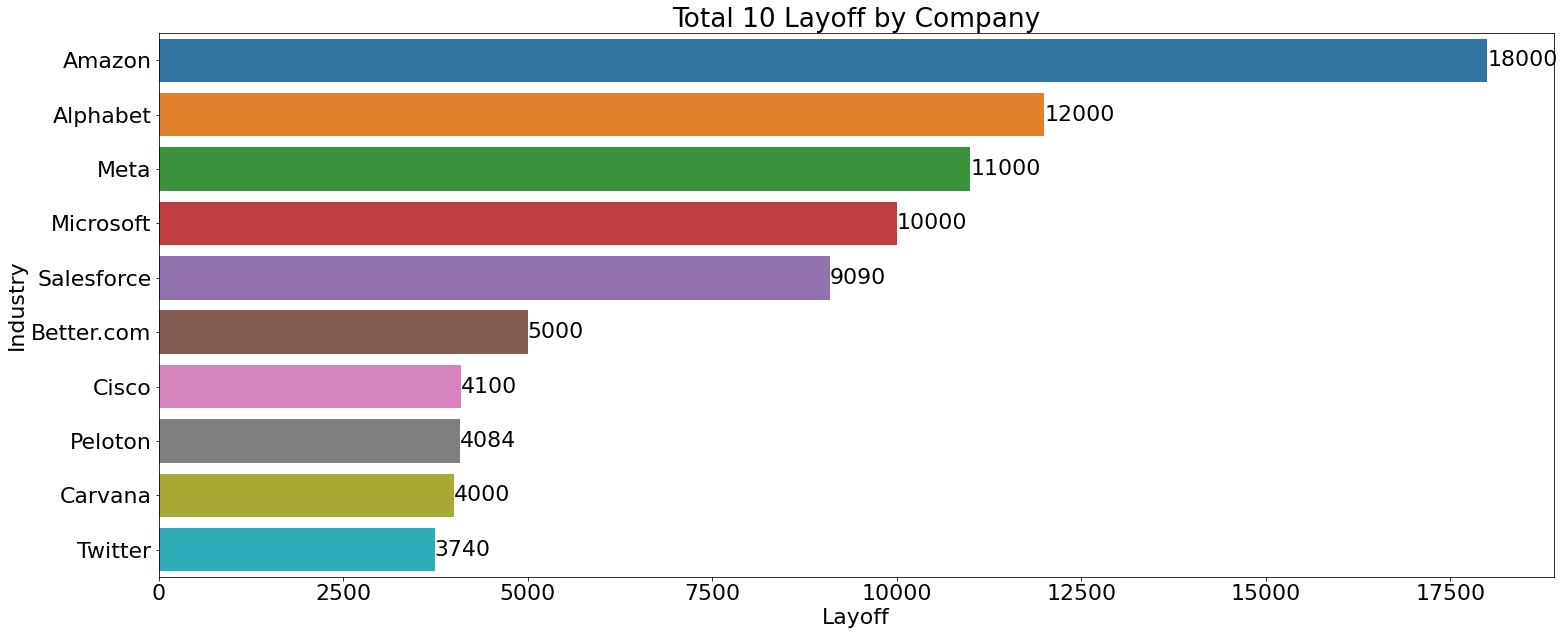

In [471]:
x = data['total_layoffs']
y = data['company']
top10 = data.sort_values(by="total_layoffs", ascending=False).head(10)

#draw the graph
plt.figure(figsize=(25,10))
l=sns.barplot(x='total_layoffs', y='company', data=top10)

#add number of layoff on each bar
for container in l.containers:
  l.bar_label(container)

plt.ylabel('Industry')
plt.xlabel('Layoff')
plt.title('Total 10 Layoff by Company')
plt.show()

In [472]:
top10_inds = data['industry'].value_counts().head(10)
top10_inds

fintech           35
software          32
proptech          30
ecommerce         29
care              27
tech              16
analytics         12
cryptocurrency    12
marketing         12
cybersecurity     11
Name: industry, dtype: int64

In [473]:
top10_inds = data.groupby('industry').size().sort_values(ascending=False).head(10)
top10_inds

industry
fintech           35
software          32
proptech          30
ecommerce         29
care              27
tech              16
analytics         12
marketing         12
cryptocurrency    12
edtech            11
dtype: int64

In [474]:
#run this one only once, twice it'll get error, and need to reset runtime
top10_inds = top10_inds.to_frame().reset_index()
top10_inds

,industry,0
0,fintech,35
1,software,32
2,proptech,30
3,ecommerce,29
4,care,27
5,tech,16
6,analytics,12
7,marketing,12
8,cryptocurrency,12
9,edtech,11


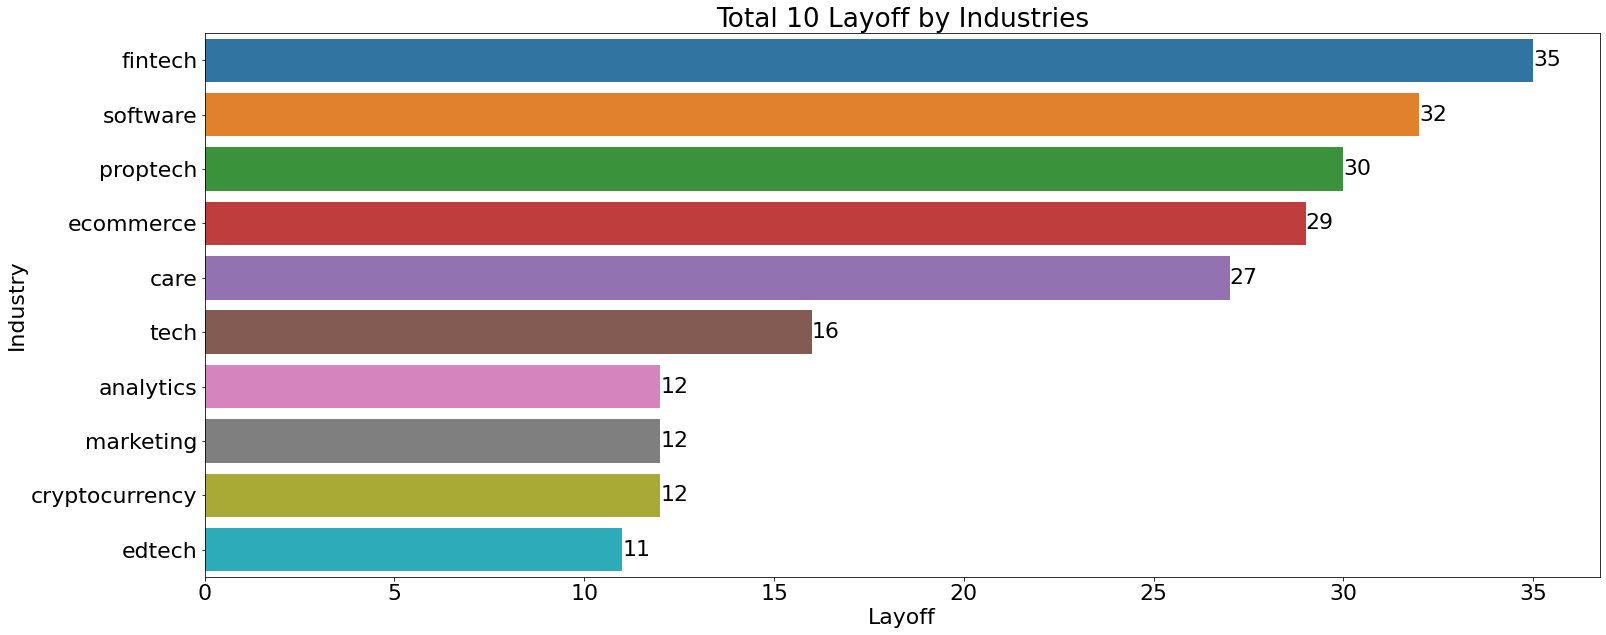

In [476]:
plt.figure(figsize=(25,10))
l=sns.barplot(y='industry',x=0, data=top10_inds)

#add number of layoff on each bar
for container in l.containers:
  l.bar_label(container)

plt.ylabel('Industry')
plt.xlabel('Layoff')
plt.title('Total 10 Layoff by Industries')
plt.show()

In [477]:
top10_hq = data['headquarter_location'].value_counts().head(10)
top10_hq

sanfrancisco    136
newyork          77
ca               51
seattle          21
losangeles       20
boston           16
chicago          12
ma                6
tx                6
atlanta           5
Name: headquarter_location, dtype: int64

In [479]:
top10_hq = data.groupby('headquarter_location').size().sort_values(ascending=False).head(10)
top10_hq

headquarter_location
sanfrancisco    136
newyork          77
ca               51
seattle          21
losangeles       20
boston           16
chicago          12
ma                6
tx                6
sandiego          5
dtype: int64

In [480]:
#run this one only once, twice it'll get error, and need to reset runtime
top10_hq = top10_hq.to_frame().reset_index()
top10_hq

,headquarter_location,0
0,sanfrancisco,136
1,newyork,77
2,ca,51
3,seattle,21
4,losangeles,20
5,boston,16
6,chicago,12
7,ma,6
8,tx,6
9,sandiego,5


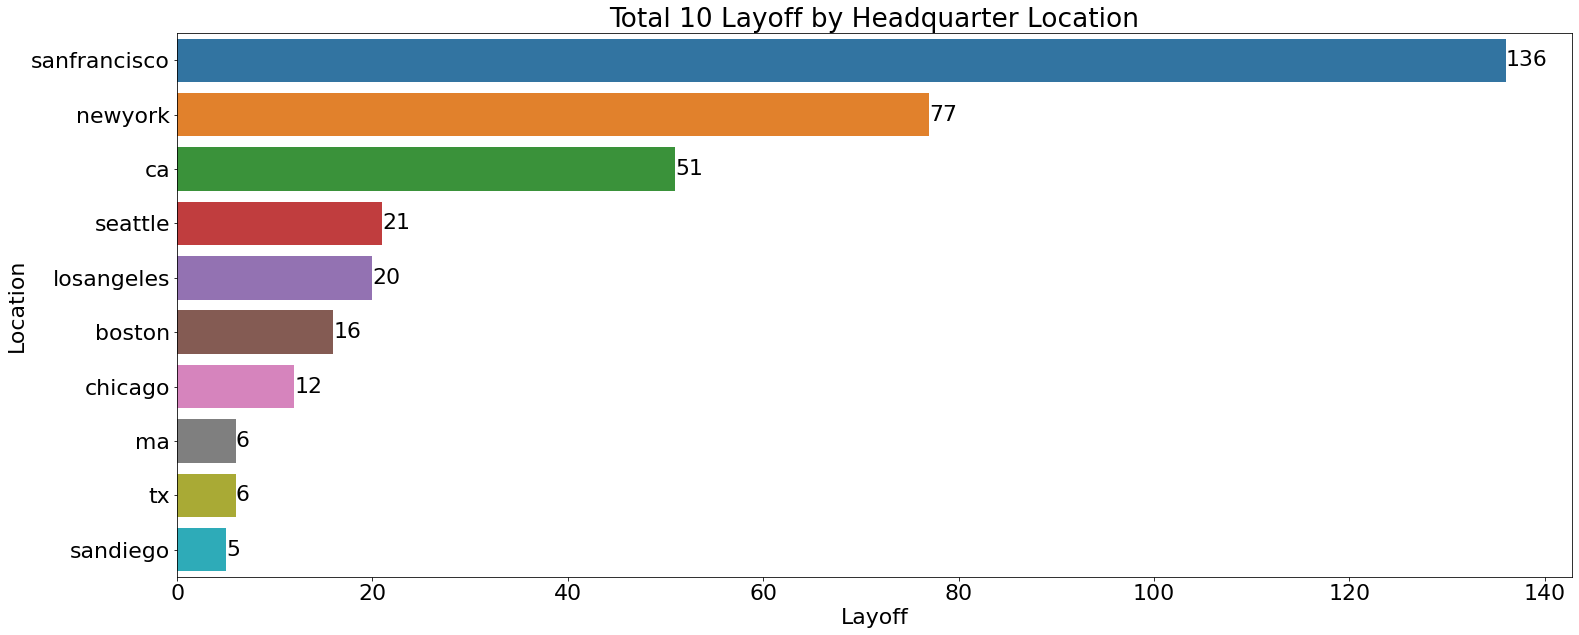

In [481]:
plt.figure(figsize=(25,10))
l=sns.barplot(y='headquarter_location',x=0, data=top10_hq)

#add number of layoff on each bar
for container in l.containers:
  l.bar_label(container)

plt.ylabel('Location')
plt.xlabel('Layoff')
plt.title('Total 10 Layoff by Headquarter Location')
plt.show()

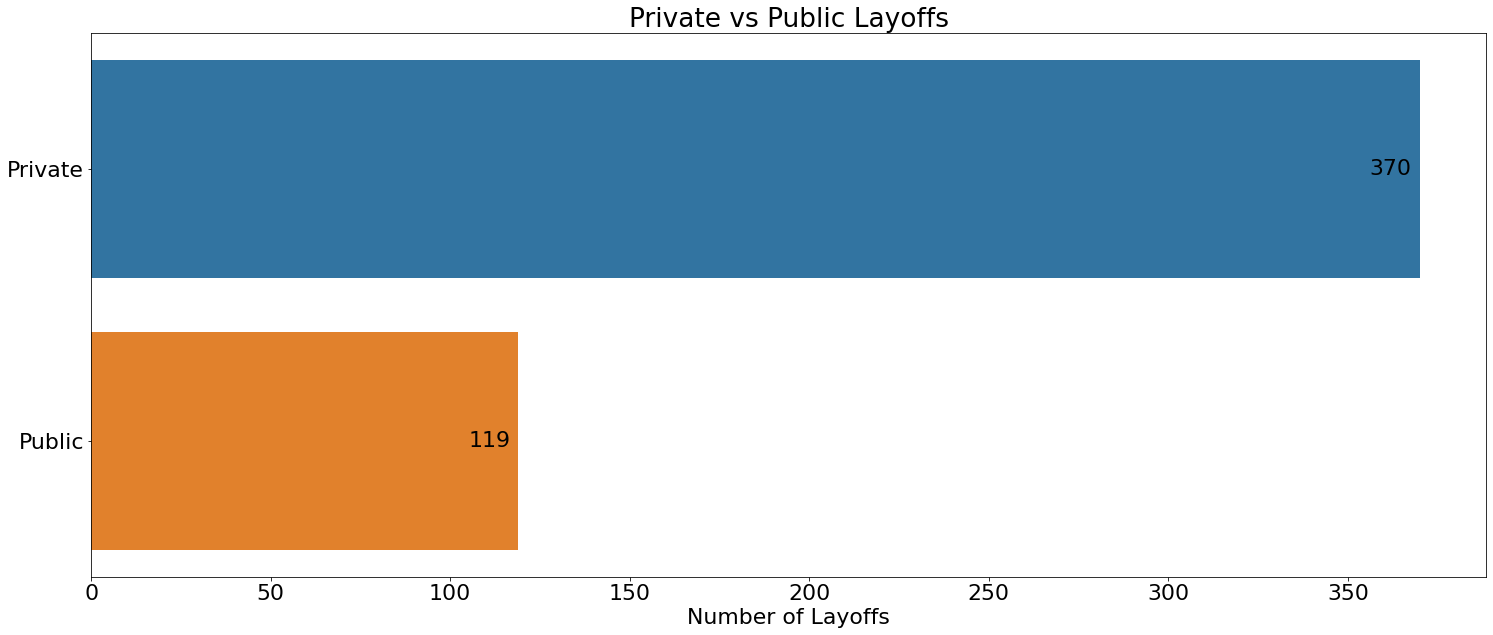

In [488]:
plt.subplots(figsize=(25,10))
l=sns.countplot(y='status', data=data)

for container in l.containers:
  l.bar_label(container, padding=-50)

plt.title('Private vs Public Layoffs')
plt.xlabel('Number of Layoffs')
plt.ylabel('')
plt.show()

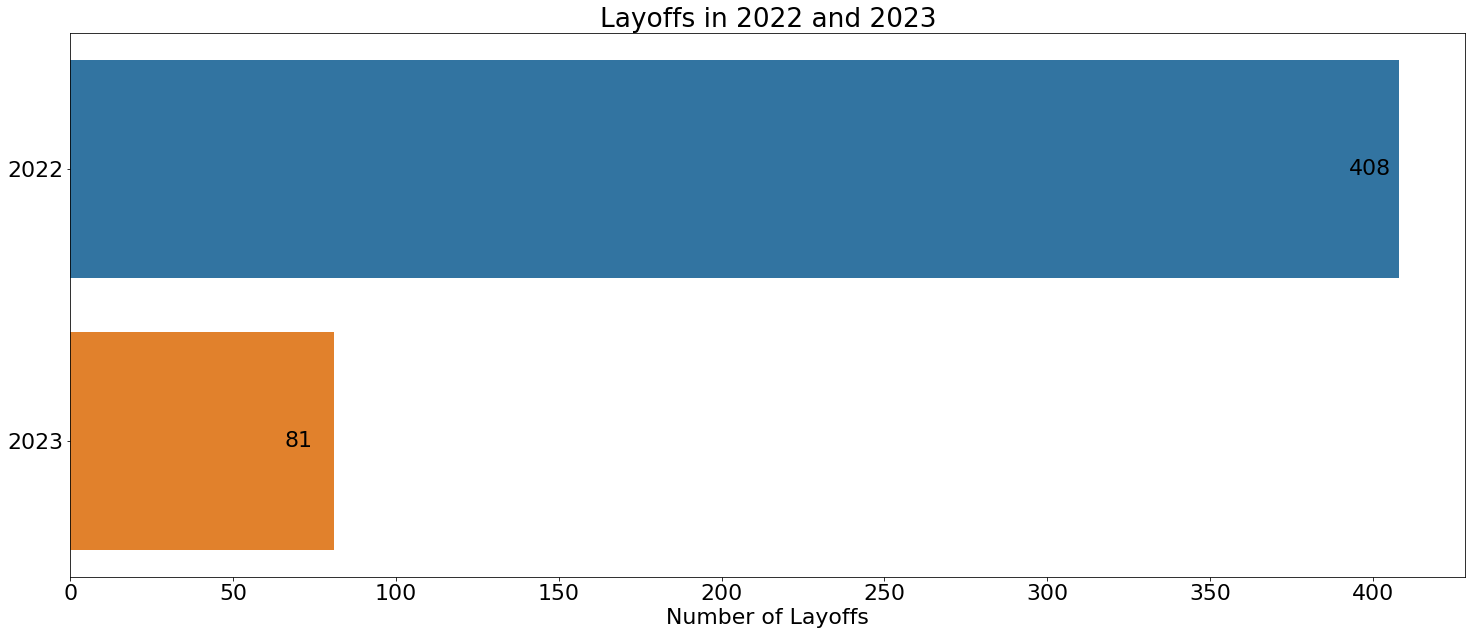

In [489]:
plt.subplots(figsize=(25,10))
l=sns.countplot(y='Year', data=data)

for container in l.containers:
  l.bar_label(container, padding=-50)

plt.title('Layoffs in 2022 and 2023')
plt.xlabel('Number of Layoffs')
plt.ylabel('')
plt.show()

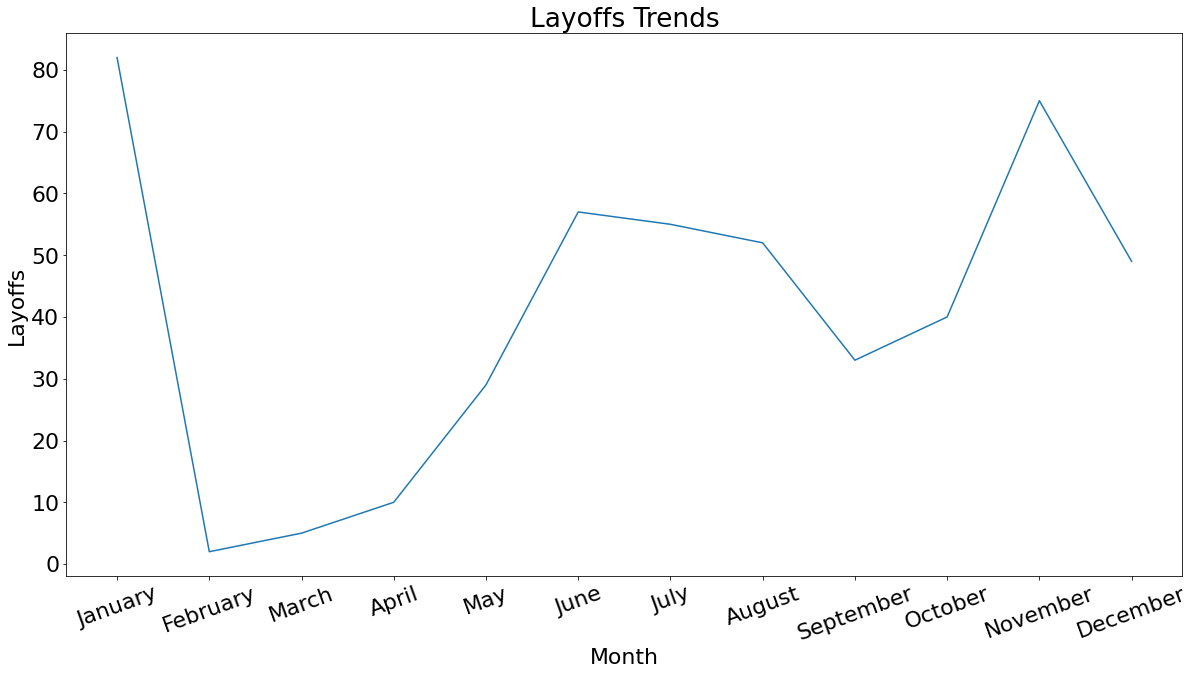

In [490]:
import calendar

plt.figure(figsize=(20,10))

# group the data by month and player and calculate the total feature
gg = data.groupby(["Month"])["total_layoffs"].count()
gg = gg.reset_index()

#create a line chart using Seaborn
sns.lineplot(x="Month", y="total_layoffs", data=gg)

# add a title and axis labels
plt.title("Layoffs Trends")
plt.xlabel("Month")
plt.ylabel("Layoffs")

# set the x-tick labels as the names of the months
plt.xticks(range(1,13), [calendar.month_name[i] for i in range(1,13)], rotation=20)

# show the plot
plt.show()